In [1]:
# This is a hidden cell which will be executed but will not show up in Sphinx docs.
# To hide a cell, in Jupyter go to Menu->View->Cell Toolbar->Edit Metadata
# and enter in {"nbsphinx": "hidden"}

# Set figure size and font size
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['font.size'] = 12

# Configure quickplot to hide subports
import functools
from phidl import quickplot as qp
import phidl
qp = functools.partial(qp, show_subports = False)
phidl.quickplot = qp



# .. ###############
# .. ## To-be documented
# .. 


# .. .. literalinclude:: gen_geometry.py
# ..    :language: python
# ..    :dedent: 0
# ..    :start-after: example-fill_rectangle
# ..    :end-before: create_image

# .. .. image:: _static/fill_rectangle.png
# ..    :align: center



# .. .. literalinclude:: gen_geometry.py
# ..    :language: python
# ..    :dedent: 0
# ..    :start-after: example-grating
# ..    :end-before: create_image

# .. .. image:: _static/grating.png
# ..    :align: center



# .. .. literalinclude:: gen_geometry.py
# ..    :language: python
# ..    :dedent: 0
# ..    :start-after: example-test_via
# ..    :end-before: create_image

# .. .. image:: _static/test_via.png
# ..    :align: center



# .. .. literalinclude:: gen_geometry.py
# ..    :language: python
# ..    :dedent: 0
# ..    :start-after: example-test_comb
# ..    :end-before: create_image

# .. .. image:: _static/test_comb.png
# ..    :align: center



# .. .. literalinclude:: gen_geometry.py
# ..    :language: python
# ..    :dedent: 0
# ..    :start-after: example-test_ic
# ..    :end-before: create_image

# .. .. image:: _static/test_ic.png
# ..    :align: center



# .. .. literalinclude:: gen_geometry.py
# ..    :language: python
# ..    :dedent: 0
# ..    :start-after: example-test_res
# ..    :end-before: create_image

# .. .. image:: _static/test_res.png
# ..    :align: center

# Geometry library

Reference for the built-in geometry library in [PHIDL](https://github.com/amccaugh/phidl).  Most of the functions here are found in PHIDL's `phidl.geometry` library, which is typically imported as `pg`.  For instance, below you will see the `phidl.geometry.arc()` function called as `pg.arc()`

## Basic shapes

### Rectangle

To create a simple rectangle, there are two functions:

``pg.rectangle()`` can create a basic rectangle:

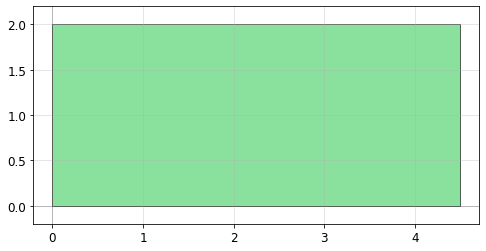

In [2]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.rectangle(size = (4.5, 2), layer = 0)
qp(D) # quickplot the geometry

``pg.bbox()`` can also create a rectangle based on a bounding box.  This is useful if you want to create a rectangle which exactly surrounds a piece of existing geometry.  For example, if we have an arc geometry and we want to define a box around it, we can use ``pg.bbox()``: 

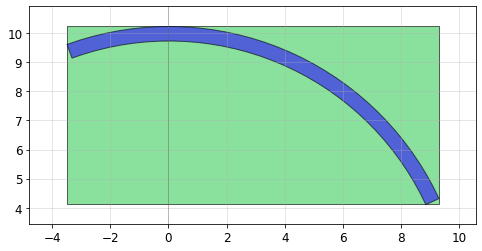

In [3]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
arc = D << pg.arc(radius = 10, width = 0.5, theta = 85, layer = 1).rotate(25)
# Draw a rectangle around the arc we created by using the arc's bounding box
rect = D << pg.bbox(bbox = arc.bbox, layer = 0)
qp(D) # quickplot the geometry

### Cross

The ``pg.cross()`` function creates a cross structure:

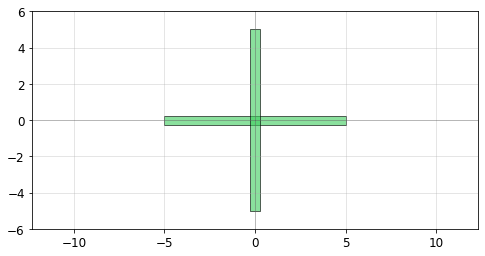

In [4]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.cross(length = 10, width = 0.5, layer = 0)
qp(D) # quickplot the geometry

### Ellipse

The ``pg.ellipse()`` function creates an ellipse by defining the major and minor radii:

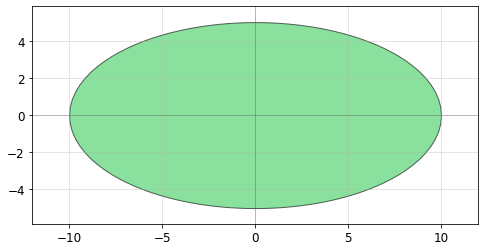

In [5]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.ellipse(radii = (10,5), angle_resolution = 2.5, layer = 0)
qp(D)

### Circle

The ``pg.circle()`` function creates a circle:

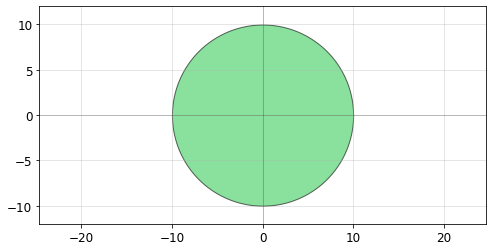

In [6]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.circle(radius = 10, angle_resolution = 2.5, layer = 0)
qp(D) # quickplot the geometry

### Ring


The ``pg.ring()`` function creates a ring.  The radius refers to the center radius of the ring structure (halfway between the inner and outer radius).

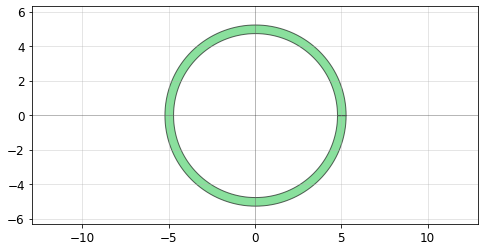

In [7]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.ring(radius = 5, width = 0.5, angle_resolution = 2.5, layer = 0)
qp(D) # quickplot the geometry

### Arc

The ``pg.arc()`` function creates an arc.  The radius refers to the center radius of the arc (halfway between the inner and outer radius).  The arc has two ports, ``1`` and ``2``, on either end, allowing you to easily connect it to other structures.

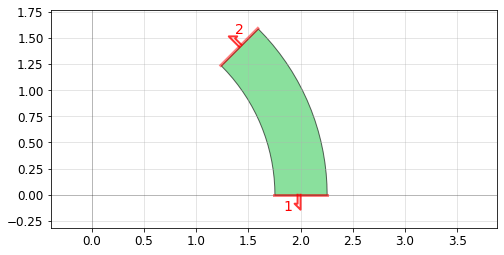

In [8]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.arc(radius = 2.0, width = 0.5, theta = 45, start_angle = 0,
           angle_resolution = 2.5, layer = 0)
qp(D) # quickplot the geometry

### Tapers


`pg.taper()`is defined by setting its length and its start and end length.  It has two ports, ``1`` and ``2``, on either end, allowing you to easily connect it to other structures.

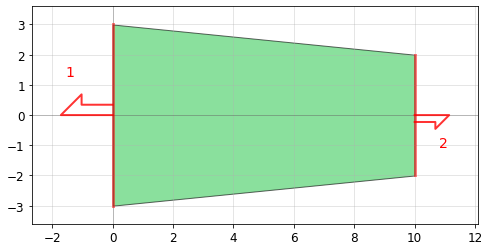

In [9]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.taper(length = 10, width1 = 6, width2 = 4, port = None, layer = 0)
qp(D) # quickplot the geometry

`pg.ramp()` is a structure is similar to `taper()` except it is asymmetric.  It also has two ports, ``1`` and ``2``, on either end.

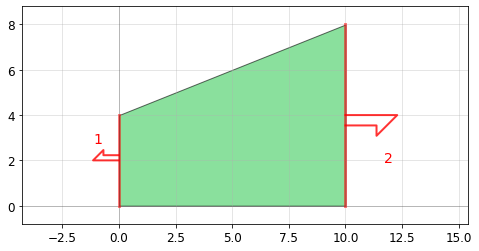

In [10]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.ramp(length = 10, width1 = 4, width2 = 8, layer = 0)
qp(D) # quickplot the geometry

### Common compound shapes

The `pg.L()` function creates a "L" shape with ports on either end named ``1`` and ``2``.

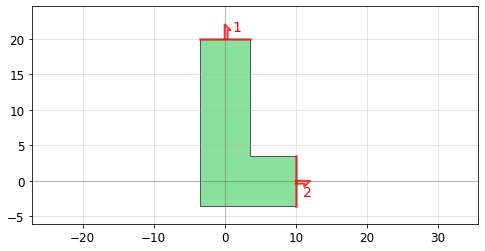

In [11]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.L(width = 7, size = (10,20) , layer = 0)
qp(D) # quickplot the geometry

The `pg.C()` function creates a "C" shape with ports on either end named ``1`` and ``2``.

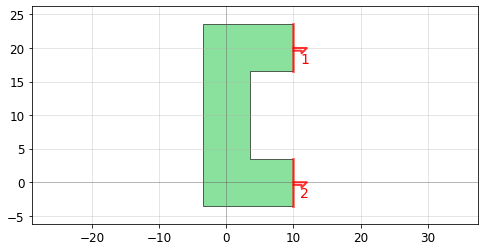

In [12]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.C(width = 7, size = (10,20) , layer = 0)
qp(D) # quickplot the geometry

## Text
PHIDL has an implementation of the DEPLOF font with the majority of english ASCII characters represented.

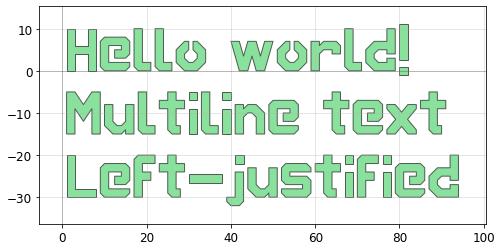

In [13]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.text(text = 'Hello world!\nMultiline text\nLeft-justified', size = 10,
            justify = 'left', layer = 0)
# `justify` should be either 'left', 'center', or 'right'
qp(D) # quickplot the geometry

Furthermore, you can also use any true-type font or open-type font that is installed on your system. For portability, fonts can also be referenced by path.

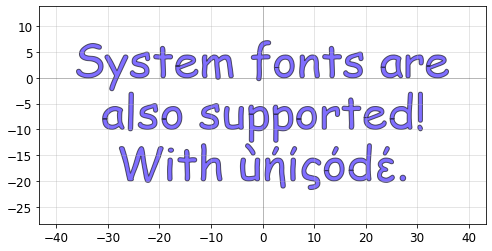

In [14]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.text(text = 'System fonts are\nalso supported!\nWith ùήίςόdέ.', size = 10,
            justify = 'center', layer = 1, face="Comic Sans MS")
# Alternatively, fonts can be loaded by file name
qp(D) # quickplot the geometry

## Packer / align / distribute

### Packer


The ``pg.packer()`` function is able to pack geometries together into rectangular bins. If a ``max_size`` is specified, the function will create as many bins as is necessary to pack all the geometries and then return a list of the filled-bin Devices.

Here we generate several random shapes then pack them together automatically. We allow the bin to be as large as needed to fit all the Devices by specifying ``max_size = (None, None)``.  By setting ``aspect_ratio = (2,1)``, we specify the rectangular bin it tries to pack them into should be twice as wide as it is tall:

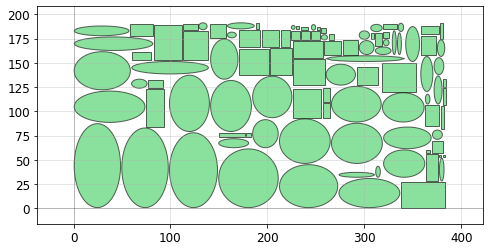

In [15]:
import phidl.geometry as pg
from phidl import quickplot as qp
import numpy as np

np.random.seed(5)
D_list = [pg.ellipse(radii = np.random.rand(2)*n+2) for n in range(50)]
D_list += [pg.rectangle(size = np.random.rand(2)*n+2) for n in range(50)]

D_packed_list = pg.packer(
        D_list,                 # Must be a list or tuple of Devices
        spacing = 1.25,         # Minimum distance between adjacent shapes
        aspect_ratio = (2,1),   # (width, height) ratio of the rectangular bin
        max_size = (None,None), # Limits the size into which the shapes will be packed
        density = 1.05,          # Values closer to 1 pack tighter but require more computation
        sort_by_area = True,    # Pre-sorts the shapes by area
        verbose = False,
        )
D = D_packed_list[0] # Only one bin was created, so we plot that
qp(D) # quickplot the geometry

Say we need to pack many shapes into multiple 500x500 unit die. If we set ``max_size = (500,500)`` the shapes will be packed into as many 500x500 unit die as required to fit them all:

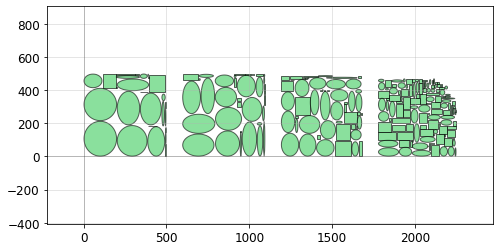

In [16]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device
import numpy as np

np.random.seed(1)
D_list = [pg.ellipse(radii = np.random.rand(2)*n+2) for n in range(120)]
D_list += [pg.rectangle(size = np.random.rand(2)*n+2) for n in range(120)]

D_packed_list = pg.packer(
        D_list,                 # Must be a list or tuple of Devices
        spacing = 4,         # Minimum distance between adjacent shapes
        aspect_ratio = (1,1),   # Shape of the box
        max_size = (500,500),   # Limits the size into which the shapes will be packed
        density = 1.05,         # Values closer to 1 pack tighter but require more computation
        sort_by_area = True,    # Pre-sorts the shapes by area
        verbose = False,
        )

# Put all packed bins into a single device and spread them out with distribute()
F = Device()
[F.add_ref(D) for D in D_packed_list]
F.distribute(elements = 'all', direction = 'x', spacing = 100, separation = True)
qp(F)

Note that the packing problem is an NP-complete problem, so ``pg.packer()`` may be slow if there are more than a few hundred Devices to pack (in that case, try pre-packing a few dozen at a time then packing the resulting bins). Requires the ``rectpack`` python package.

### Distribute


The ``distribute()`` function allows you to space out elements within a Device evenly in the x or y direction.  It is meant to duplicate the distribute functionality present in Inkscape / Adobe Illustrator:

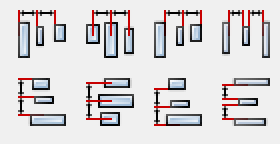

Say we start out with a few random-sized rectangles we want to space out:

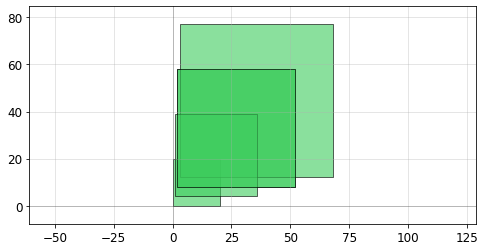

In [17]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
# Create different-sized rectangles and add them to D
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n,n*4))) for n in [0,2,3,1,2]]

qp(D) # quickplot the geometry

Oftentimes, we want to guarantee some distance between the objects.  By setting ``separation = True`` we move each object such that there is ``spacing`` distance between them:

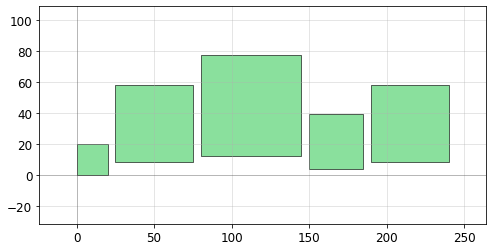

In [18]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
# Create different-sized rectangles and add them to D
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n,n*4))) for n in [0,2,3,1,2]]
# Distribute all the rectangles in D along the x-direction with a separation of 5
D.distribute(elements = 'all',   # either 'all' or a list of objects
             direction = 'x',    # 'x' or 'y'
             spacing = 5,
             separation = True)

qp(D) # quickplot the geometry

Alternatively, we can spread them out on a fixed grid by setting ``separation = False``. Here we align the left edge (``edge = 'min'``) of each object along a grid spacing of 100:

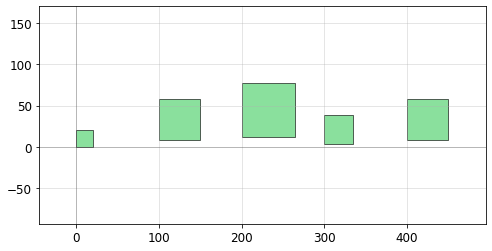

In [19]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n,n*4))) for n in [0,2,3,1,2]]
D.distribute(elements = 'all', direction = 'x', spacing = 100, separation = False,
             edge = 'xmin') # edge must be either 'xmin' (left), 'xmax' (right), or 'x' (center)

qp(D) # quickplot the geometry

The alignment can be done along the right edge as well by setting ``edge = 'max'``, or along the center by setting ``edge = 'center'`` like in the following:

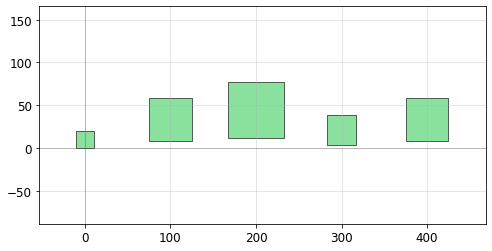

In [20]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n-10,n*4))) for n in [0,2,3,1,2]]
D.distribute(elements = 'all', direction = 'x', spacing = 100, separation = False,
             edge = 'x') # edge must be either 'xmin' (left), 'xmax' (right), or 'x' (center)

qp(D) # quickplot the geometry

### Align


The ``align()`` function allows you to elements within a Device horizontally or vertically.  It is meant to duplicate the alignment functionality present in Inkscape / Adobe Illustrator:

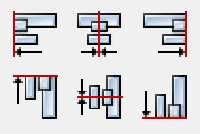

Say we ``distribute()`` a few objects, but they're all misaligned:

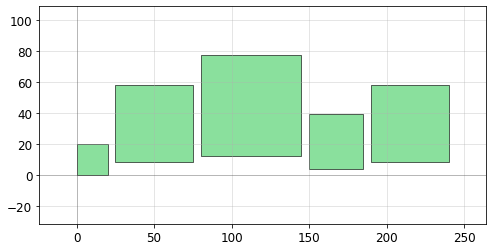

In [21]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
# Create different-sized rectangles and add them to D then distribute them
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n,n*4))) for n in [0,2,3,1,2]]
D.distribute(elements = 'all', direction = 'x', spacing = 5, separation = True)

qp(D) # quickplot the geometry

we can use the ``align()`` function to align their top edges (``alignment = 'ymax'):

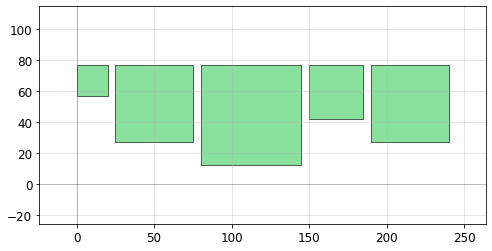

In [22]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
# Create different-sized rectangles and add them to D then distribute them
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n,n*4))) for n in [0,2,3,1,2]]
D.distribute(elements = 'all', direction = 'x', spacing = 5, separation = True)

# Align top edges
D.align(elements = 'all', alignment = 'ymax')

qp(D) # quickplot the geometry

or align their centers (``alignment = 'y'):

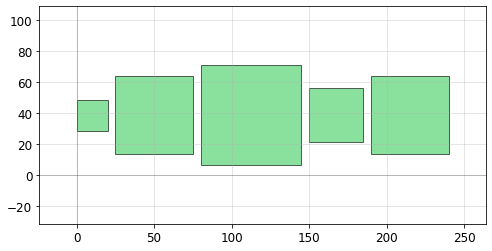

In [23]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

D = Device()
# Create different-sized rectangles and add them to D then distribute them
[D.add_ref(pg.rectangle(size = [n*15+20,n*15+20]).move((n,n*4))) for n in [0,2,3,1,2]]
D.distribute(elements = 'all', direction = 'x', spacing = 5, separation = True)

# Align top edges
D.align(elements = 'all', alignment = 'y')

qp(D) # quickplot the geometry

other valid alignment options include ``'xmin', 'x', 'xmax', 'ymin', 'y', and 'ymax'``

## Boolean / outline / offset / invert
There are several common boolean-type operations available in the geometry library.  These include typical boolean operations (and/or/not/xor), offsetting (expanding/shrinking polygons), outlining, and inverting.

### Boolean


The ``pg.boolean()`` function can perform AND/OR/NOT/XOR operations, and will return a new geometry with the result of that operation.

Speedup note: The ``num_divisions`` argument can be used to divide up the geometry into multiple rectangular regions and process each region sequentially (which is more computationally efficient).  If you have a large geometry that takes a long time to process, try using ``num_divisions = [10,10]`` to optimize the operation.

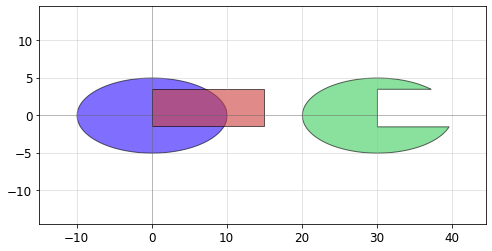

In [24]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

E = pg.ellipse(radii = (10,5), layer = 1)
R = pg.rectangle(size = [15,5], layer = 2).movey(-1.5)
C = pg.boolean(A = E, B = R, operation = 'not', precision = 1e-6,
               num_divisions = [1,1], layer = 0)
# Other operations include 'and', 'or', 'xor', or equivalently 'A-B', 'B-A', 'A+B'

# Plot the originals and the result
D = Device()
D.add_ref(E)
D.add_ref(R)
D.add_ref(C).movex(30)
qp(D) # quickplot the geometry

### Offset


The ``pg.offset()`` function takes the polygons of the input geometry, combines them together, and expands/contracts them.  The function returns polygons on a single layer -- it does not respect layers.

Speedup note: The ``num_divisions`` argument can be used to divide up the geometry into multiple rectangular regions and process each region sequentially (which is more computationally efficient).  If you have a large geometry that takes a long time to process, try using ``num_divisions = [10,10]`` to optimize the operation.

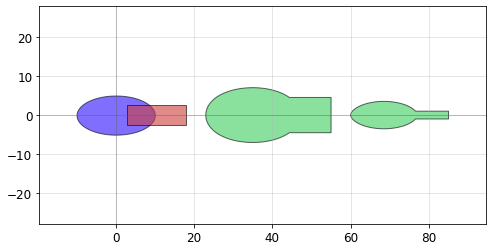

In [25]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

# Create `T`, an ellipse and rectangle which will be offset (expanded / contracted)
T = Device()
e = T << pg.ellipse(radii = (10,5), layer = 1)
r = T << pg.rectangle(size = [15,5], layer = 2)
r.move([3,-2.5])

Texpanded = pg.offset(T, distance = 2, join_first = True, precision = 1e-6, 
        num_divisions = [1,1], layer = 0)
Tshrink = pg.offset(T, distance = -1.5, join_first = True, precision = 1e-6, 
        num_divisions = [1,1], layer = 0)

# Plot the original geometry, the expanded, and the shrunk versions
D = Device()
t1 = D.add_ref(T)
t2 = D.add_ref(Texpanded)
t3 = D.add_ref(Tshrink)
D.distribute([t1,t2,t3], direction = 'x', spacing = 5)
qp(D) # quickplot the geometry

### Outline


The ``pg.outline()`` function takes the polygons of the input geometry then performs an offset and "not" boolean operation to create an outline.  The function returns polygons on a single layer -- it does not respect layers.

Speedup note: The ``num_divisions`` argument can be used to divide up the geometry into multiple rectangular regions and process each region sequentially (which is more computationally efficient).  If you have a large geometry that takes a long time to process, try using ``num_divisions = [10,10]`` to optimize the operation.

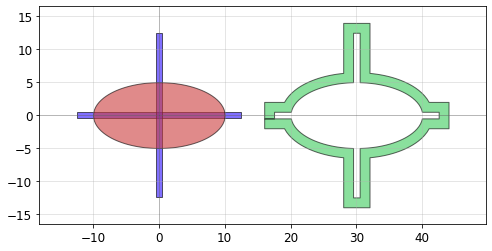

In [26]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

# Create a blank device and add two shapes
X = Device()
X.add_ref(pg.cross(length = 25, width = 1, layer = 1))
X.add_ref(pg.ellipse(radii = [10,5], layer = 2))

O = pg.outline(X, distance = 1.5, precision = 1e-6, layer = 0)

# Plot the original geometry and the result
D = Device()
D.add_ref(X)
D.add_ref(O).movex(30)
qp(D) # quickplot the geometry

### Invert


The ``pg.invert()`` function creates an inverted version of the input geometry.  The function creates a rectangle around the geometry (with extra padding of distance ``border``), then subtract all polygons from all layers from that rectangle, resulting in an inverted version of the geometry.

Speedup note: The ``num_divisions`` argument can be used to divide up the geometry into multiple rectangular regions and process each region sequentially (which is more computationally efficient).  If you have a large geometry that takes a long time to process, try using ``num_divisions = [10,10]`` to optimize the operation.

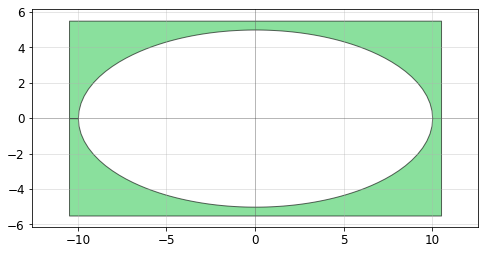

In [27]:
import phidl.geometry as pg
from phidl import quickplot as qp

E = pg.ellipse(radii = (10,5))
D = pg.invert(E, border = 0.5, precision = 1e-6, layer = 0)
qp(D) # quickplot the geometry

### Union


The ``pg.union()`` function is a "join" function, and is functionally identical to the "OR" operation of ``pg.boolean()``.  The one difference is it's able to perform this function layer-wise, so each layer can be individually combined.

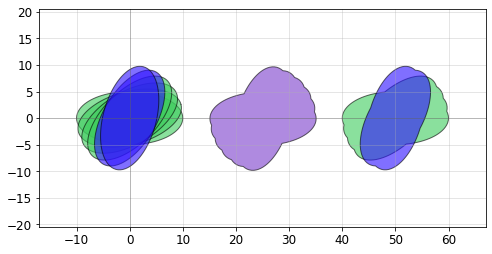

In [28]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = Device()
D << pg.ellipse(layer = 0)
D << pg.ellipse(layer = 0).rotate(15*1)
D << pg.ellipse(layer = 0).rotate(15*2)
D << pg.ellipse(layer = 0).rotate(15*3)
D << pg.ellipse(layer = 1).rotate(15*4)
D << pg.ellipse(layer = 1).rotate(15*5)

# We have two options to unioning - take all polygons, regardless of 
# layer, and join them together (in this case on layer 4) like so:
D_joined = pg.union(D, by_layer = False, layer = 4)

# Or we can perform the union operate by-layer
D_joined_by_layer = pg.union(D, by_layer = True)

# Space out shapes
D.add_ref(D_joined).movex(25)
D.add_ref(D_joined_by_layer).movex(50)
qp(D) # quickplot the geometry

### XOR / diff


The ``pg.xor_diff()`` function can be used to compare two geometries and identify where they are different.  Specifically, it performs a layer-wise XOR operation.  If two geometries are identical, the result will be an empty Device.  If they are not identical, any areas not shared by the two geometries will remain.

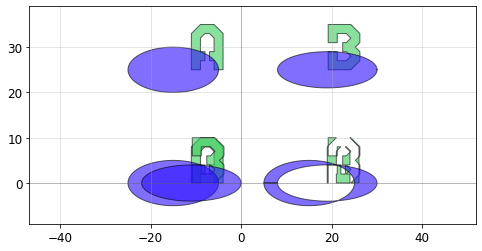

In [29]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

A = Device()
A.add_ref(pg.ellipse(radii = [10,5], layer = 1))
A.add_ref(pg.text('A')).move([3,0])
B = Device()
B.add_ref(pg.ellipse(radii = [11,4], layer = 1).movex(4))
B.add_ref(pg.text('B')).move([3.2,0])
X = pg.xor_diff(A = A, B = B, precision = 1e-6)

# Plot the original geometry and the result
# Upper left: A / Upper right: B
# Lower left: A and B / Lower right: A xor B "diff" comparison
D = Device()
D.add_ref(A).move([-15,25])
D.add_ref(B).move([15,25])
D.add_ref(A).movex(-15)
D.add_ref(B).movex(-15)
D.add_ref(X).movex(15)
qp(D) # quickplot the geometry

## Lithography structures

### Step-resolution

The `pg.litho_steps()` function creates lithographic test structure that is useful for measuring resolution of photoresist or electron-beam resists.  It provides both positive-tone and negative-tone resolution tests.

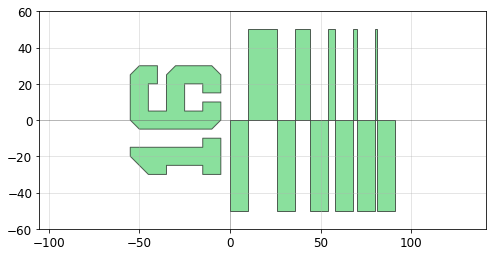

In [30]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.litho_steps(
        line_widths = [1,2,4,8,16],
        line_spacing = 10,
        height = 100,
        layer = 0
        )
qp(D) # quickplot the geometry

### Lithographic star

The `pg.litho_star()` function makes a common lithographic test structure known as a "star" that is just several lines intersecting at a centerpoint.

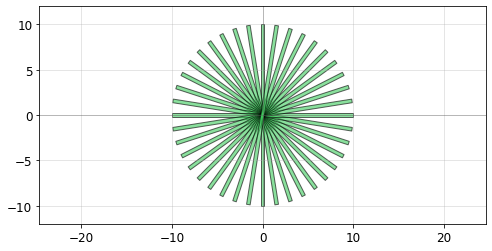

In [31]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.litho_star(
        num_lines = 20,
        line_width = 0.4,
        diameter = 20,
        layer = 0
        )
qp(D) # quickplot the geometry

### Calipers (inter-layer alignment)

The `pg.litho_calipers()` function is used to detect offsets in multilayer fabrication.  It creates a two sets of notches on different layers.  When an fabrication error/offset occurs, it is easy to detect how much the offset is because both center-notches are no longer aligned.

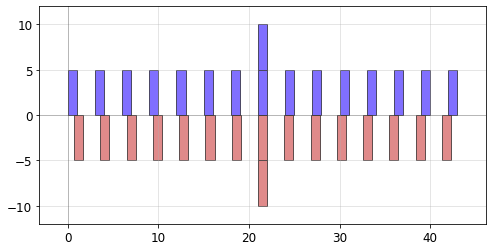

In [32]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.litho_calipers(
        notch_size = [1,5],
        notch_spacing = 2,
        num_notches = 7,
        offset_per_notch = 0.1,
        row_spacing = 0,
        layer1 = 1,
        layer2 = 2)
qp(D) # quickplot the geometry

## Importing GDS files

`pg.import_gds()` allows you to easily import external GDSII files.  It imports a single cell from the external GDS file and converts it into a PHIDL device.

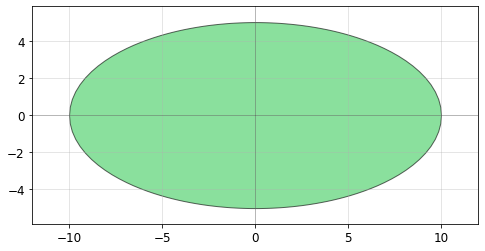

In [33]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.ellipse()
D.write_gds('myoutput.gds')
D = pg.import_gds(filename = 'myoutput.gds', cellname = None, flatten = False)
qp(D) # quickplot the geometry

## LayerSet

The `LayerSet` class allows you to predefine a collection of layers and specify their properties including: gds layer/datatype, name, and color.  It also comes with a handy preview function called `pg.preview_layerset()`

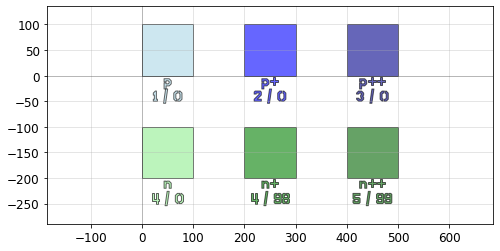

In [34]:
import phidl.geometry as pg
from phidl import quickplot as qp

from phidl import LayerSet
lys = LayerSet()
lys.add_layer('p', color = 'lightblue', gds_layer = 1, gds_datatype = 0)
lys.add_layer('p+', color = 'blue', gds_layer = 2, gds_datatype = 0)
lys.add_layer('p++', color = 'darkblue', gds_layer = 3, gds_datatype = 0)
lys.add_layer('n', color = 'lightgreen', gds_layer = 4, gds_datatype = 0)
lys.add_layer('n+', color = 'green', gds_layer = 4, gds_datatype = 98)
lys.add_layer('n++', color = 'darkgreen', gds_layer = 5, gds_datatype = 99)
D = pg.preview_layerset(lys, size = 100, spacing = 100)
qp(D) # quickplot the geometry

In [35]:
# This is a hidden cell which will be executed but will not show up in Sphinx docs.
# To hide a cell, in Jupyter go to Menu->View->Cell Toolbar->Edit Metadata
# and enter in {"nbsphinx": "hidden"}

# Set figure size and font size
import phidl
phidl.reset()

## Useful contact pads / connectors

These functions are common shapes with ports, often used to make contact pads

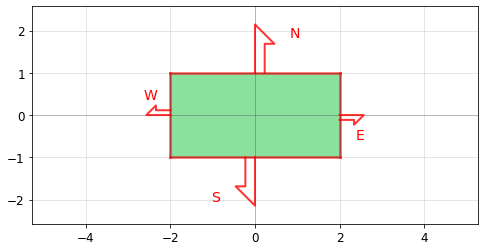

In [36]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.compass(size = (4,2), layer = 0)
qp(D) # quickplot the geometry

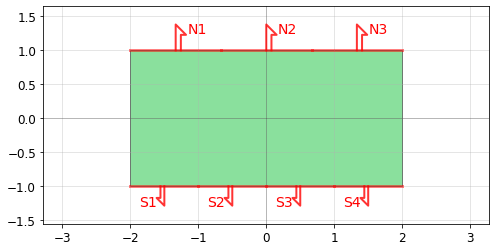

In [37]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.compass_multi(size = (4,2), ports = {'N':3,'S':4}, layer = 0)
qp(D) # quickplot the geometry

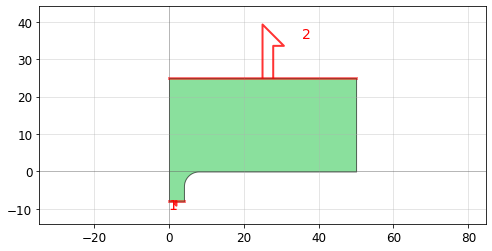

In [38]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.flagpole(size = (50,25), stub_size = (4,8), shape = 'p', taper_type = 'fillet', layer = 0)
# taper_type should be None, 'fillet', or 'straight'

qp(D) # quickplot the geometry

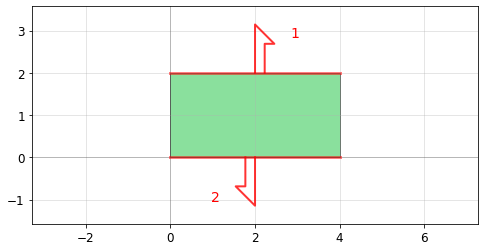

In [39]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.straight(size = (4,2), layer = 0)
qp(D) # quickplot the geometry

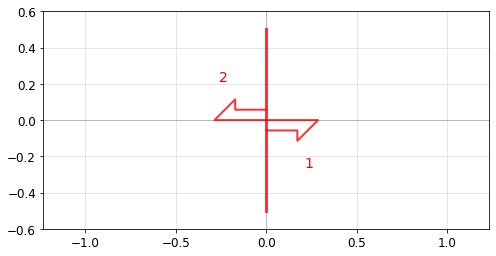

In [40]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.connector(midpoint = (0,0), width = 1, orientation = 0)
qp(D) # quickplot the geometry

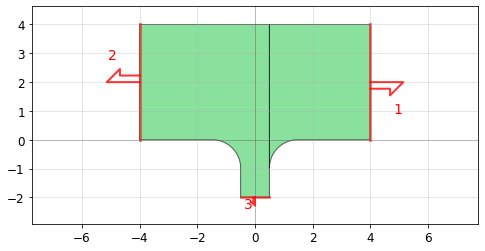

In [41]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.tee(size = (8,4), stub_size = (1,2), taper_type = 'fillet', layer = 0)
# taper_type should be None, 'fillet', or 'straight'

qp(D) # quickplot the geometry

## Chip / die template

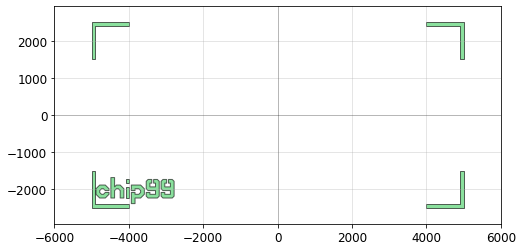

In [42]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.basic_die(
              size = (10000, 5000), # Size of die
              street_width = 100,   # Width of corner marks for die-sawing
              street_length = 1000, # Length of corner marks for die-sawing
              die_name = 'chip99',  # Label text
              text_size = 500,      # Label text size
              text_location = 'SW', # Label text compass location e.g. 'S', 'SE', 'SW'
              layer = 0,
              draw_bbox = False,
              bbox_layer = 99,
              )
qp(D) # quickplot the geometry

## Optimal superconducting curves
The following structures are meant to reduce "current crowding" in superconducting thin-film structures (such as superconducting nanowires).  They are the result of conformal mapping equations derived in  Clem, J. & Berggren, K. "[Geometry-dependent critical currents in superconducting nanocircuits." Phys. Rev. B 84, 1–27 (2011).](http://dx.doi.org/10.1103/PhysRevB.84.174510)

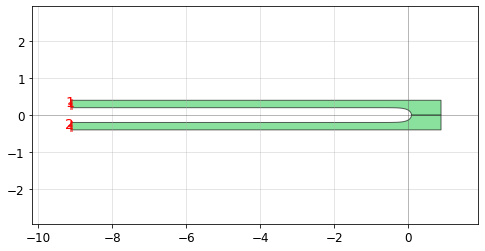

In [43]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.optimal_hairpin(width = 0.2, pitch = 0.6, length = 10,
    turn_ratio = 4, num_pts = 50, layer = 0)
qp(D) # quickplot the geometry

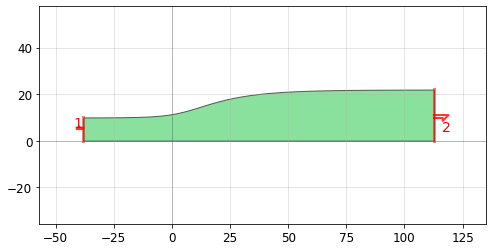

In [44]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.optimal_step(start_width = 10, end_width = 22, num_pts = 50, width_tol = 1e-3,
                 anticrowding_factor = 1.2, symmetric = False, layer = 0)
qp(D) # quickplot the geometry

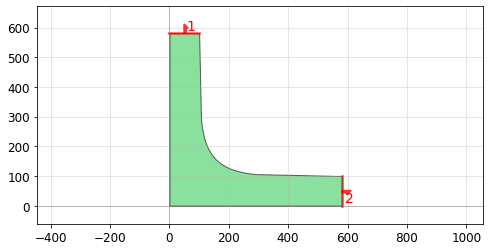

In [45]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.optimal_90deg(width = 100.0, num_pts = 15, length_adjust = 1, layer = 0)
qp(D) # quickplot the geometry

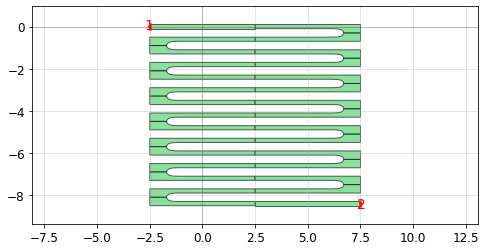

In [46]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.snspd(wire_width = 0.2, wire_pitch = 0.6, size = (10,8),
        num_squares = None, turn_ratio = 4,
        terminals_same_side = False, layer = 0)
qp(D) # quickplot the geometry

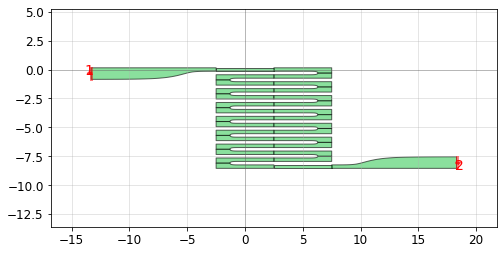

In [47]:
import phidl.geometry as pg
from phidl import quickplot as qp

D = pg.snspd_expanded(wire_width = 0.3, wire_pitch = 0.6, size = (10,8),
           num_squares = None, connector_width = 1, connector_symmetric = False,
            turn_ratio = 4, terminals_same_side = False, layer = 0)
qp(D) # quickplot the geometry

## Copying and extracting geometry

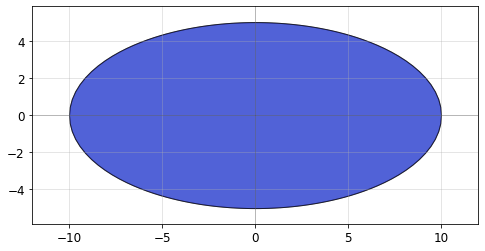

In [48]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

E = Device()
E.add_ref(pg.ellipse(layer = {0,1}))
#X = pg.ellipse(layer = {0,1})
D = pg.extract(E, layers = [0,1])
qp(D) # quickplot the geometry

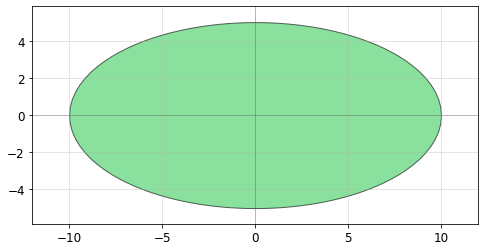

In [49]:
import phidl.geometry as pg
from phidl import quickplot as qp

X = pg.ellipse()
D = pg.copy(X)
qp(D) # quickplot the geometry

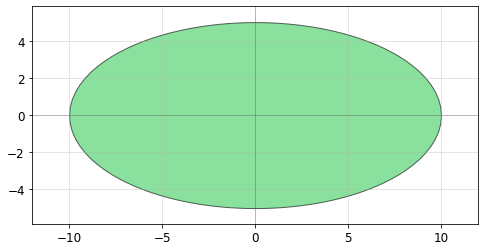

In [50]:
import phidl.geometry as pg
from phidl import quickplot as qp

X = pg.ellipse()
D = pg.deepcopy(X)
qp(D) # quickplot the geometry

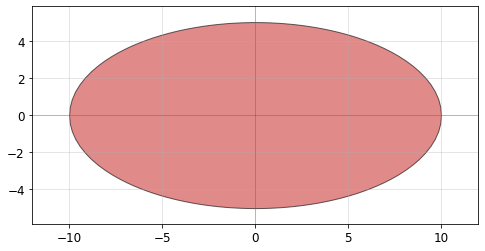

In [51]:
import phidl.geometry as pg
from phidl import quickplot as qp

X = Device()
X << pg.ellipse(layer = 0)
X << pg.ellipse(layer = 1)
D = pg.copy_layer(X, layer = 1, new_layer = 2)
qp(D) # quickplot the geometry